# Unsupervised Learning

In the class we learned two commonly used unsupervised learning algorithms:
* Principal Component Analysis
* K-Means

In this exercise we will use the two to perform clustering for Iris Data set.

## Iris Dataset

[Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) is a very popular dataset in machine learning community. Developed by Fisher, it containd 3 classes each with 50 instances. Each of the three class refers to a type of Iris plant. Each data point consists of four different attributes and a class label:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
 * Iris Setosa
 * Iris Versicolour
 * Iris Virginica




In [ ]:
#@title Import Necessary Modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Exercise 1: Download Data

Download the data using `tf.keras.utils.get_file()` function. Pass two arguments to the function the file name and the url containg the data.

* For training data use the file name (`fname`) "iris_training.csv" and the url is "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

* For test data use the file name (`fname`) "iris_test.csv" and the url is "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

For more information and usage you can refer to [TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file).



In [62]:
# To Do Complete the code
## Replace the ... with right code
import tensorflow as tf
import pandas as pd

train_path = tf.keras.utils.get_file("iris_training.csv","https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv","https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

# ----------------- Do not change anything below ------------------------------------#
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

print(train.head())
print(test.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          6.4         2.8          5.6         2.2        2
1          5.0         2.3          3.3         1.0        1
2          4.9         2.5          4.5         1.7        2
3          4.9         3.1          1.5         0.1        0
4          5.7         3.8          1.7         0.3        0
   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          5.9         3.0          4.2         1.5        1
1          6.9         3.1          5.4         2.1        2
2          5.1         3.3          1.7         0.5        0
3          6.0         3.4          4.5         1.6        1
4          5.5         2.5          4.0         1.3        1


### Exercise 2: Data Analysis and Visualization

Analyze the data. Analyzing data is avery important skill. You can start from simple information like size of test and train dataset. To random sample of few to plotting between different features. [Here](https://www.kaggle.com/kstaud85/iris-data-visualization) is an example dataset visualization notebook for Iris Dataset. You can take some ideas from here.

As part of the exercise we expect you to perform atleast three analysis/visualizations. 
You can use as many code cells as you need.

Remember `train` and `test` are Pandas DataFrames.

In [63]:
## To do write code to analyze and visualize the data
#  you can add as many code cells as you requre
# below for example we show the top 5 samples from training dataset.
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [64]:
print(train.describe())
print(test.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth     Species
count   120.000000  120.000000   120.000000  120.000000  120.000000
mean      5.845000    3.065000     3.739167    1.196667    1.000000
std       0.868578    0.427156     1.822100    0.782039    0.840168
min       4.400000    2.000000     1.000000    0.100000    0.000000
25%       5.075000    2.800000     1.500000    0.300000    0.000000
50%       5.800000    3.000000     4.400000    1.300000    1.000000
75%       6.425000    3.300000     5.100000    1.800000    2.000000
max       7.900000    4.400000     6.900000    2.500000    2.000000
       SepalLength  SepalWidth  PetalLength  PetalWidth    Species
count    30.000000   30.000000    30.000000   30.000000  30.000000
mean      5.836667    3.010000     3.836667    1.206667   1.000000
std       0.653628    0.463383     1.537459    0.694775   0.742781
min       4.300000    2.200000     1.100000    0.100000   0.000000
25%       5.500000    2.725000     2.300000    0.6250

In [65]:
print(train.corr())
print(test.corr())

             SepalLength  SepalWidth  PetalLength  PetalWidth   Species
SepalLength     1.000000   -0.076125     0.875830    0.822914  0.786500
SepalWidth     -0.076125    1.000000    -0.387772   -0.324107 -0.393378
PetalLength     0.875830   -0.387772     1.000000    0.962470  0.950742
PetalWidth      0.822914   -0.324107     0.962470    1.000000  0.959223
Species         0.786500   -0.393378     0.950742    0.959223  1.000000
             SepalLength  SepalWidth  PetalLength  PetalWidth   Species
SepalLength     1.000000   -0.284737     0.852684    0.797492  0.767068
SepalWidth     -0.284737    1.000000    -0.575541   -0.501474 -0.540996
PetalLength     0.852684   -0.575541     1.000000    0.966272  0.942089
PetalWidth      0.797492   -0.501474     0.966272    1.000000  0.942141
Species         0.767068   -0.540996     0.942089    0.942141  1.000000


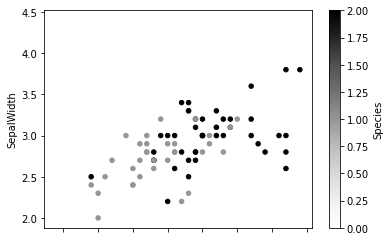

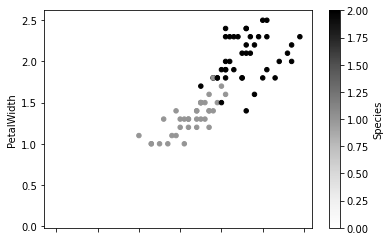

In [66]:
train.plot.scatter(x='SepalLength',y='SepalWidth',c='Species')
train.plot.scatter(x='PetalLength',y='PetalWidth',c='Species')

### Exercise 3 : Preprocess the data

Implement the following steps:

1. Drop the label - Species, since we are doing Unsupervised learning we do not need labels.

 ###### You may want to save labels separately too verify if indeed your model has been able to cluster properly.

2. For PCA it is good if the data has zero mean and variance of 1. To achieve this subtract mean and  divide by standard deviation.


In [67]:
## Drop the labels

train = train.drop(columns = "Species", axis = 1)
test = test.drop(columns = "Species", axis = 1)


In [68]:
# Subtract mean from individual value and divide by standard deviation
import numpy as np
def normalization(df):
  for i in df.columns:
    avg_column = np.mean(df[i])
    std_column = np.std(df[i])
    df[i] = (df[i] - avg_column)/std_column
  return(df)


normalized_train= normalization(train)
normalized_test= normalization(test)

### Exercise 4: 
Compute the SUV matrices using TensorFlow `linalg()` function. Once you get SUV matrices convert S matrix to diagonal matrix  using `tf.linalg.diag()` 

In [69]:
# Compute the SUV matrces
#tf.linalg.svd(train)
s, u, v = tf.linalg.svd(train)

In [70]:
s = tf.linalg.diag(s)
s

<tf.Tensor: shape=(4, 4), dtype=float64, numpy=
array([[18.61768864,  0.        ,  0.        ,  0.        ],
       [ 0.        , 10.66842723,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  4.13452596,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.57226753]])>

### Exercise 5:

Now compute the PCA for 2 principal components. See how the shape gets modified from original dataset and PCA dataset.

In [71]:
k = 2

pca = tf.matmul(u,tf.matmul(s,v))
pca = np.array(pca)
pca = pd.DataFrame(pca, columns = ["pca1","pca2","pca3","pca4"])
pca = pca.iloc[:,:k]



In [ ]:
print('original data shape',train.shape)
print('reduced data shape', pca.shape)

original data shape (120, 4)
reduced data shape (120, 2)


### Exercise 6:
Let us plot and see if our PCA is able to cluster the dataset.

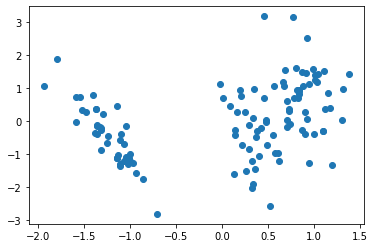

In [75]:
import matplotlib.pyplot as plt
plt.scatter(pca.pca1, pca.pca2)

## Optional Exercise

Repeating the clustering process this time using the K-means algorithm on the Iris dataset. Reflect on the result.